# Spooky Author Identification

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib

import nltk

In [122]:
train_data = pd.read_csv('file:///D:/Machine Learning/Kaggle/Spooky/train.csv')
test_data = pd.read_csv('file:///D:/Machine Learning/Kaggle/Spooky/test.csv')

In [4]:
train_data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
id        19579 non-null object
text      19579 non-null object
author    19579 non-null object
dtypes: object(3)
memory usage: 459.0+ KB


In [6]:
train_data.isnull().sum()

id        0
text      0
author    0
dtype: int64

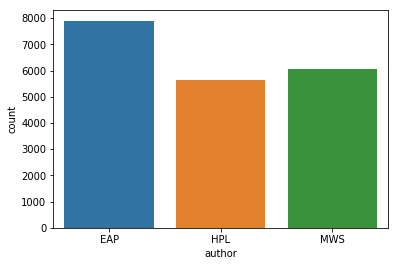

In [12]:
sns.countplot(train_data.author)
plt.show()

# NLP

In [127]:
train_data_copy = train_data.copy()

In [128]:
train_data_copy.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL


In [129]:
train_data_copy.text = train_data_copy.text.map(lambda t:  nltk.word_tokenize(t)) 
train_data_copy.head()

,id,text,author
0,id26305,"[This, process, ,, however, ,, afforded, me, no, means, of, ascertaining, the, dimensions, of, my, dungeon, ;, as, I, might, make, its, circuit, ,, and, return, to, the, point, whence, I, set, out, ,, without, being, aware, of, the, fact, ;, so, perfectly, uniform, seemed, the, wall, .]",EAP
1,id17569,"[It, never, once, occurred, to, me, that, the, fumbling, might, be, a, mere, mistake, .]",HPL
2,id11008,"[In, his, left, hand, was, a, gold, snuff, box, ,, from, which, ,, as, he, capered, down, the, hill, ,, cutting, all, manner, of, fantastic, steps, ,, he, took, snuff, incessantly, with, an, air, of, the, greatest, possible, self, satisfaction, .]",EAP
3,id27763,"[How, lovely, is, spring, As, we, looked, from, Windsor, Terrace, on, the, sixteen, fertile, counties, spread, beneath, ,, speckled, by, happy, cottages, and, wealthier, towns, ,, all, looked, as, in, former, years, ,, heart, cheering, and, fair, .]",MWS
4,id12958,"[Finding, nothing, else, ,, not, even, gold, ,, the, Superintendent, abandoned, his, attempts, ;, but, a, perplexed, look, occasionally, steals, over, his, countenance, as, he, sits, thinking, at, his, desk, .]",HPL


## Премахване на стоп думите

In [130]:
stopwords = nltk.corpus.stopwords.words('english')

In [131]:
train_data_copy.text = train_data_copy.text.map(lambda t:  [word for word in t if word.lower() not in stopwords])
train_data_copy.head()

,id,text,author
0,id26305,"[process, ,, however, ,, afforded, means, ascertaining, dimensions, dungeon, ;, might, make, circuit, ,, return, point, whence, set, ,, without, aware, fact, ;, perfectly, uniform, seemed, wall, .]",EAP
1,id17569,"[never, occurred, fumbling, might, mere, mistake, .]",HPL
2,id11008,"[left, hand, gold, snuff, box, ,, ,, capered, hill, ,, cutting, manner, fantastic, steps, ,, took, snuff, incessantly, air, greatest, possible, self, satisfaction, .]",EAP
3,id27763,"[lovely, spring, looked, Windsor, Terrace, sixteen, fertile, counties, spread, beneath, ,, speckled, happy, cottages, wealthier, towns, ,, looked, former, years, ,, heart, cheering, fair, .]",MWS
4,id12958,"[Finding, nothing, else, ,, even, gold, ,, Superintendent, abandoned, attempts, ;, perplexed, look, occasionally, steals, countenance, sits, thinking, desk, .]",HPL


In [132]:
train_data_copy.text = train_data_copy.text.map(lambda t:   ' '.join(t))
train_data_copy.head()

,id,text,author
0,id26305,"process , however , afforded means ascertaining dimensions dungeon ; might make circuit , return point whence set , without aware fact ; perfectly uniform seemed wall .",EAP
1,id17569,never occurred fumbling might mere mistake .,HPL
2,id11008,"left hand gold snuff box , , capered hill , cutting manner fantastic steps , took snuff incessantly air greatest possible self satisfaction .",EAP
3,id27763,"lovely spring looked Windsor Terrace sixteen fertile counties spread beneath , speckled happy cottages wealthier towns , looked former years , heart cheering fair .",MWS
4,id12958,"Finding nothing else , even gold , Superintendent abandoned attempts ; perplexed look occasionally steals countenance sits thinking desk .",HPL


In [133]:
train_x = np.array(train_data_copy.text)
train_y = np.array(train_data_copy.author)

In [141]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
classifier = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
])
classifier.fit(train_x, train_y)

# parameter tuning with grid search
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (0, 0.01, 0.05, 0.1, 0.3, 0.5),
}


gs_clf = GridSearchCV(classifier, parameters)
gs_clf.fit(train_x, train_y)
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(gs_clf.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)



# # Predicting the Test set results
# y_pred_proba = gs_clf.predict_proba(train_x)

C:\Users\Simeon\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Simeon\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Simeon\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Simeon\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Simeon\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Simeon\Anaconda3

,rank_test_score,mean_test_score,params
16,1,0.836662,"{'clf__alpha': 0.05, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}"
17,2,0.835845,"{'clf__alpha': 0.05, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 3)}"
22,3,0.834721,"{'clf__alpha': 0.1, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}"
19,4,0.833904,"{'clf__alpha': 0.1, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}"
11,5,0.833699,"{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 3)}"
10,6,0.833393,"{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}"
13,7,0.833342,"{'clf__alpha': 0.05, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}"
21,7,0.833342,"{'clf__alpha': 0.1, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}"
14,9,0.832729,"{'clf__alpha': 0.05, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 3)}"
15,10,0.832627,"{'clf__alpha': 0.05, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}"


In [181]:
#{'clf__alpha': 0.05, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}
from sklearn.feature_extraction.text import TfidfVectorizer
classifier = Pipeline([('features', TfidfVectorizer(ngram_range=(1, 2))),
                      ('tfidf', TfidfTransformer(use_idf=False)),
                      ('clf', MultinomialNB(alpha=0.05)),
])
print(cross_val_score(classifier, train_x, train_y, cv=3, n_jobs=3))
print(cross_val_score(classifier, train_x, train_y, cv=3, n_jobs=3,scoring='neg_log_loss'))

[ 0.83363971  0.83343549  0.83295019]
[-0.42645099 -0.42854691 -0.4272385 ]


In [182]:
sample_submission = pd.read_csv("file:///D:/Machine Learning/Kaggle/Spooky/sample_submission.csv",  index_col=['id'])
sample_submission.head()

,EAP,HPL,MWS
id,,,
id02310,0.403494,0.287808,0.308698
id24541,0.403494,0.287808,0.308698
id00134,0.403494,0.287808,0.308698
id27757,0.403494,0.287808,0.308698
id04081,0.403494,0.287808,0.308698


In [183]:
classifier.fit(train_x, train_y)

Pipeline(memory=None,
     steps=[('features', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True...lse,
         use_idf=False)), ('clf', MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True))])

In [184]:
from sklearn import metrics
prediction = classifier.predict(train_x)
print('The accuracy of the Random Forests with test data is',metrics.accuracy_score(prediction,train_y))

The accuracy of the Random Forests with test data is 0.998569896317


In [185]:
test_data_copy = test_data.copy()

In [186]:
test_data_copy.text = test_data_copy.text.map(lambda t:  nltk.word_tokenize(t))
test_data_copy.text = test_data_copy.text.map(lambda t:  [word for word in t if word.lower() not in stopwords])
test_data_copy.text = test_data_copy.text.map(lambda t:   ' '.join(t))
test_data_copy.head()

,id,text
0,id02310,"Still , urged leaving Ireland inquietude impatience , father thought best yield ."
1,id24541,"fire wanted fanning , could readily fanned newspaper , government grew weaker , doubt leather iron acquired durability proportion , , short time , pair bellows Rotterdam ever stood need stitch required assistance hammer ."
2,id00134,"broken frail door found : two cleanly picked human skeletons earthen floor , number singular beetles crawling shadowy corners ."
3,id27757,"thinking possibly manage without , one actually tumbled head , , rolling steep side steeple , lodged rain gutter ran along eaves main building ."
4,id04081,sure limit knowledge may extend .


In [187]:
test_predictions = classifier.predict_proba(test_data_copy.text)

In [188]:
submit_file = pd.DataFrame(test_predictions, columns=['EAP', 'HPL', 'MWS'], index=test_data.id)
submit_file.head(10)

,EAP,HPL,MWS
id,,,
id02310,0.111381,0.018723,0.869896
id24541,0.911976,0.034705,0.053319
id00134,0.280525,0.708856,0.010620
id27757,0.773774,0.223388,0.002838
id04081,0.858904,0.086121,0.054976
id27337,0.836288,0.142271,0.021441
id24265,0.711561,0.190672,0.097766
id25917,0.127117,0.226767,0.646116
id04951,0.978171,0.020959,0.000869


In [189]:
submit_file.to_csv('~/Desktop/predictionsSpooky.csv')
submit_file.head()

,EAP,HPL,MWS
id,,,
id02310,0.111381,0.018723,0.869896
id24541,0.911976,0.034705,0.053319
id00134,0.280525,0.708856,0.010620
id27757,0.773774,0.223388,0.002838
id04081,0.858904,0.086121,0.054976


# Резултат в Kaggle : 0.39319, 257 място към момента. 

https://www.kaggle.com/simeonsg